In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA #modelo manual
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score
import statsmodels.tsa.stattools as stattools
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Sales_Data.xlsx")
df


,Order Date,Sales
0,2015-01-01,14205.7070
1,2015-02-01,4519.8920
2,2015-03-01,55205.7970
3,2015-04-01,27906.8550
4,2015-05-01,23644.3030
5,2015-06-01,34322.9356
6,2015-07-01,33781.5430
7,2015-08-01,27117.5365
8,2015-09-01,81623.5268
9,2015-10-01,31453.3930


# _Pregunta 1_

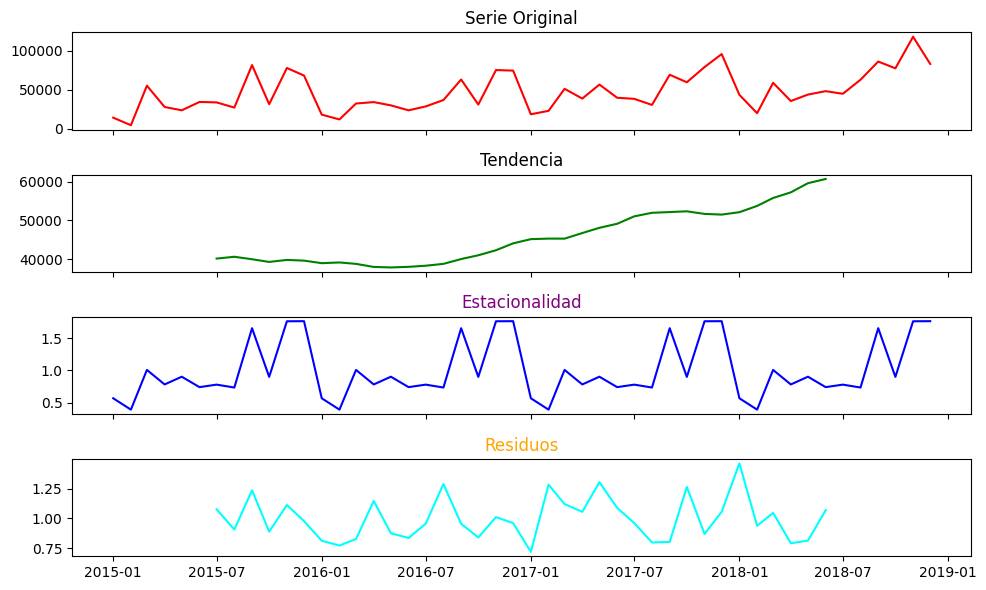

In [3]:
#convertimos la columna 'Order Date' a tipo datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

#Modificamos el indice del DataFrame para que sea la columna 'Order Date'
df.set_index('Order Date', inplace=True)

#descompone la serie de tiempo de 'Sales' en sus componentes de tendencia, estacionalidad y residuo
decomposition = seasonal_decompose(df['Sales'], model='multiplicative')

# Graficamos los componentes de la descomposición
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False,figsize=(10, 6))
axes[0].set_title('Serie Original', color='black')
axes[0].plot(decomposition.observed,color='r')
axes[1].set_title('Tendencia',color='black')
axes[1].plot(decomposition.trend,color='g')
axes[2].set_title('Estacionalidad',color='purple')
axes[2].plot(decomposition.seasonal,color='b')
axes[3].set_title('Residuos', color='orange')
axes[3].plot(decomposition.resid, color='cyan')
plt.tight_layout()
plt.show()

Serie Original (rojo):

    Este es el gráfico superior y muestra la serie temporal de ventas original, sin ninguna modificación.
    Puedes observar las fluctuaciones reales en las ventas a lo largo del tiempo, desde principios de 2015 hasta principios de 2019. Aquí se ven las variaciones, picos y valles tal como ocurrieron.
    Es la misma "Historical Data" o "Training Data" del primer gráfico que me mostraste.

Tendencia (verde):

    Este segundo gráfico muestra el componente de tendencia de la serie. La tendencia representa el movimiento a largo plazo de la serie, ya sea un aumento, una disminución o una estabilidad general a lo largo del tiempo, suavizando las fluctuaciones a corto plazo.
    En este caso, la línea verde indica una tendencia ascendente en las ventas desde 2015 hasta principios de 2018, lo que sugiere un crecimiento general en el negocio durante ese período.

Estacionalidad (azul):

    Este tercer gráfico muestra el componente de estacionalidad. La estacionalidad se refiere a los patrones que se repiten en intervalos fijos y conocidos (por ejemplo, diariamente, semanalmente, mensualmente, anualmente).
    La línea azul muestra un patrón repetitivo de picos y valles, lo que indica que las ventas tienen un comportamiento estacional. Por ejemplo, si los datos son mensuales, podría haber picos de ventas en ciertos meses del año que se repiten cada año. Los valores alrededor de 1.0 indicarían la "base" estacional, con valores por encima de 1.0 para los meses de mayor venta estacional y por debajo para los de menor venta estacional (esto es típico en una descomposición multiplicativa).

Residuos (turquesa):

    Este último gráfico muestra el componente de residuos (también llamados "ruido" o "errores"). Los residuos son las fluctuaciones de la serie temporal que no pueden ser explicadas por la tendencia o la estacionalidad.
    Idealmente, los residuos deberían ser aleatorios (sin patrones claros) y ruido blanco. Si los residuos muestran algún patrón, podría indicar que la descomposición no ha capturado completamente todas las estructuras subyacentes de la serie, o que hay otros factores no modelados que influyen en las ventas.
    Los valores de los residuos en este gráfico están alrededor de 1.0, lo que nuevamente sugiere una descomposición multiplicativa, donde los residuos son los factores por los cuales la tendencia y la estacionalidad se multiplican para obtener la serie original.

# _Pregunta 2_

ADF Statistic: -4.416136761430769
p-value: 0.00027791039276670623
La serie es estacionaria (rechazamos H0).

Después de una diferenciación:
ADF Statistic: -8.727061830353263
p-value: 3.266917547279759e-14


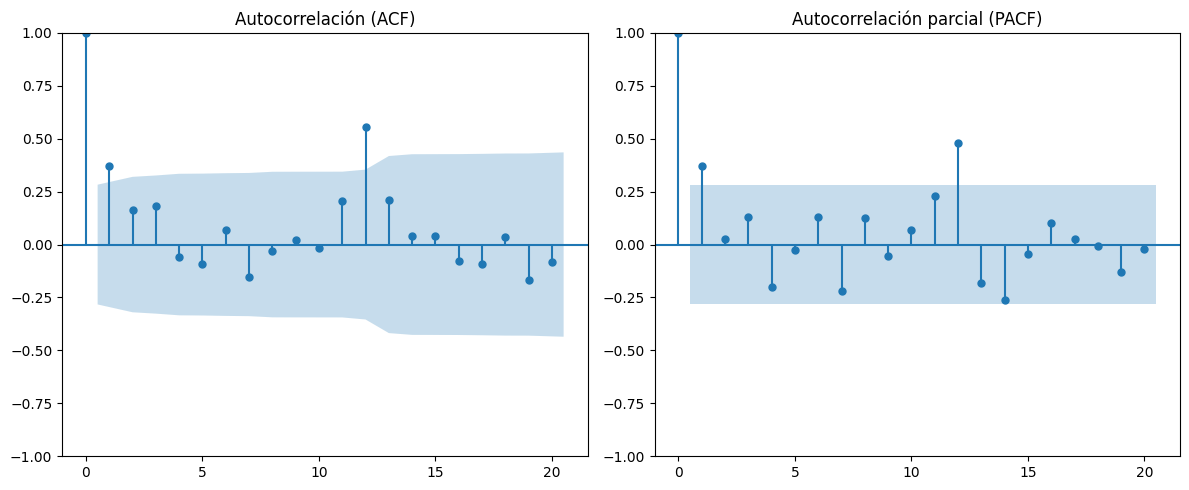

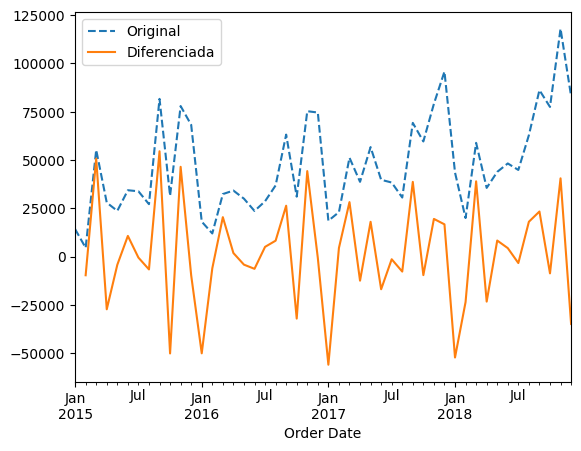

In [4]:
# Definimos la serie de tiempo
sales = df['Sales']

# Test de DICKEY-FULLER
result = stattools.adfuller(sales)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("La serie es estacionaria (rechazamos H0).")
else:
    print("La serie NO es estacionaria (no se rechaza H0). Se recomienda diferenciar.")

# Realizamos una diferenciación para hacer la serie estacionaria
sales_diff = sales.diff().dropna()

# Volvemos a aplicar ADF si es necesario
result_diff = stattools.adfuller(sales_diff)
print("\nDespués de una diferenciación:")
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])


# Graficamos ACF y PACF 
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plot_acf(sales,ax=plt.gca(), lags=20)
plt.title('Autocorrelación (ACF)')

plt.subplot(1,2,2)
plot_pacf(sales,ax=plt.gca(), lags=20)
plt.title('Autocorrelación parcial (PACF)')

plt.tight_layout()
plt.show()

# Graficar ambas series para ver la diferencia
sales.plot(label="Original", linestyle='--')
sales_diff.plot(label="Diferenciada")
plt.legend()
plt.show()


In [5]:
print(f'Estadístico de Prueba: {result[0]}')
print(f'Valor p: {result[1]}')
print(f'Número de retardos usados: {result[2]}')
print(f'Número de observaciones usadas: {result[3]}')
print(f'Valores críticos: {result[4]}')

Estadístico de Prueba: -4.416136761430769
Valor p: 0.00027791039276670623
Número de retardos usados: 0
Número de observaciones usadas: 47
Valores críticos: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


### Análisis del PACF:

    El rezago 1 tiene un valor claramente significativo (fuera del intervalo de confianza).

    El rezago 2 también parece apenas tocar el límite superior.

    A partir del rezago 3 en adelante, todos los valores están dentro del área sombreada → no significativos.

Análisis del gráfico ACF:

    El rezago 1 es altamente significativo (fuera del intervalo de confianza).

    El rezago 2 también es significativo, aunque menos.

    El rezago 3 en adelante muestran valores que están dentro del intervalo de confianza, o muy cerca del límite.    

### Gráfico: Serie Original vs. Serie Diferenciada
🔹 Serie Original (línea azul punteada):

    Muestra una tendencia creciente con el tiempo (desde 2015 hasta 2018).

    Hay variaciones estacionales o picos bastante marcados en ciertos períodos, posiblemente asociados a ciclos anuales (por ejemplo, alzas en ciertas épocas del año como diciembre).

    No es estacionaria, ya que tiene tendencia y probablemente varianza no constante.

🔸 Serie Diferenciada (línea naranja):

    La serie ya no tiene una tendencia clara, lo cual es deseable para modelar con ARIMA.

    Aunque sigue habiendo alta variabilidad, ya no muestra crecimiento sostenido.

    Parece razonablemente estacionaria después de una primera diferenciación.

# _Pregunta 3_

In [6]:
def calculate_differencing_order(series, significance_level=0.05):
    """
    Calcula el número de diferenciaciones necesarias para hacer la serie estacionaria.

    Parámetros:
        series (pd.Series): La serie temporal a analizar.
        significance_level (float): Nivel de significancia para la prueba ADF (por defecto 0.05).

    Retorna:
        int: Número de diferenciaciones necesarias (d).
    """
    # Verificar que la serie sea de tipo pandas.Series
    if not isinstance(series, pd.Series):
        raise ValueError("La entrada debe ser una pandas.Series.")

    # Eliminar valores NaN o infinitos si los hay
    series = series.replace([np.inf, -np.inf], np.nan).dropna()

    # Si la serie está vacía después de limpiar, lanzar un error
    if series.empty:
        raise ValueError("La serie está vacía después de eliminar valores no válidos.")

    d = 0
    p_value = adfuller(series)[1]
    diff_data = series.copy()

    # Realizar diferenciaciones hasta que la serie sea estacionaria
    while p_value > significance_level:
        diff_data = diff_data.diff().dropna()  # Diferenciar y eliminar NaNs
        if diff_data.empty:  # Si la serie se vacía después de diferenciar, detener el proceso
            raise ValueError("La serie no puede hacerse estacionaria con diferenciación.")
        p_value = adfuller(diff_data)[1]
        d += 1

    print(f'P Value: {p_value}\t Number of differencing needed: {d}')
    return d

In [7]:
d = calculate_differencing_order(sales, significance_level=0.05)
print(f"El número de diferenciaciones necesarias para hacer la serie estacionaria es: {d}")

P Value: 0.00027791039276670623	 Number of differencing needed: 0
El número de diferenciaciones necesarias para hacer la serie estacionaria es: 0


In [8]:
#determinadndo los valores de p
q =2
for p in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]:
    modelo = ARIMA(sales, order=(p, d, q))  # d y q los defines aparte
    resultado = modelo.fit()
    print(f'AR({p}) - AIC: {resultado.aic}')


AR(1) - AIC: 1109.0419902374758
AR(2) - AIC: 1110.767795568834
AR(3) - AIC: 1103.9409640746508
AR(4) - AIC: 1105.7959963080516
AR(5) - AIC: 1107.5315913606996
AR(6) - AIC: 1108.9535130264144
AR(7) - AIC: 1110.085809826357
AR(8) - AIC: 1111.415272165652
AR(9) - AIC: 1108.1614367793168
AR(10) - AIC: 1113.1129551387867
AR(11) - AIC: 1101.4837552950894
AR(12) - AIC: 1087.3718124881486
AR(13) - AIC: 1086.0387587266991
AR(14) - AIC: 1087.3869627580316
AR(15) - AIC: 1088.9913665796334
AR(16) - AIC: 1089.6774478188006
AR(17) - AIC: 1090.04366557497
AR(18) - AIC: 1088.759246845756
AR(19) - AIC: 1088.8037225042272
AR(20) - AIC: 1090.9020461320597


### el menor del valor de AIC en 1086.038 con un valor de p=13

In [9]:
#determinando los valores de q
p =13
for q in [1, 2, 3, 4, 5, 6, 7, 8]:
    modelo = ARIMA(sales, order=(p, d, q))  # d y q los defines aparte
    resultado = modelo.fit()
    print(f'MA({q}) - AIC: {resultado.aic}')

MA(1) - AIC: 1086.1430903318487
MA(2) - AIC: 1086.0387587266991
MA(3) - AIC: 1086.7308005307902
MA(4) - AIC: 1088.9548241047248
MA(5) - AIC: 1088.156111315167
MA(6) - AIC: 1090.2271749690865
MA(7) - AIC: 1096.188649059483
MA(8) - AIC: 1103.2447931593877


### el menor valor de AIC es 1086.038 con un valor de q=2

In [10]:
train_data = df['Sales'][:-12]  # seleccionamos los datos de entrenamiento (todas menos las últimas 12 observaciones)
test_data = df['Sales'][-12:]   # Usamos las últimas 12 observaciones como datos de prueba

# Utilizamos los valores manuales de p, d, q que hemos determinado para el modelo ARIMA
manual_p = 13
manual_d = 0
manual_q = 2
manual_order = (manual_p, manual_d, manual_q)

#Modelo ARIMA manual
model_manual = ARIMA(train_data, order=manual_order)

# Entrenamos el modelo ARIMA manual con los datos de entrenamiento
results_manual = model_manual.fit()

# Imprimimos el resumen del modelo ARIMA manual
print("Manual ARIMA Model Summary:")
print(results_manual.summary())

# Modelo ARIMA automático
model_auto = auto_arima(train_data, seasonal=True, m=12 ) 

# Entrenamos el modelo ARIMA automático con los datos de entrenamiento
results_auto = model_auto.fit(train_data)

#Imprimimos el resumen del modelo ARIMA automático
print("\nAuto ARIMA Model Summary:")
print(results_auto.summary())

# Hacer predicciones con el modelo ARIMA manual
forecast_manual = results_manual.predict(start=len(train_data), end=len(df) - 1)

# Hacer predicciones con el modelo ARIMA automático
forecast_auto = results_auto.predict(n_periods=len(test_data))

Manual ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                ARIMA(13, 0, 2)   Log Likelihood                -393.100
Date:                Thu, 05 Jun 2025   AIC                            820.200
Time:                        18:45:53   BIC                            847.119
Sample:                    01-01-2015   HQIC                           829.595
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.276e+04   9231.010      4.633      0.000    2.47e+04    6.09e+04
ar.L1          0.9280      0.568      1.635      0.102      -0.185       2.041
ar.L2         -0.2416   

In [11]:
# Evaluamos el modelo manual
rmse_manual = np.sqrt(mean_squared_error(test_data, forecast_manual))
mae_manual = mean_absolute_error(test_data, forecast_manual)
r2_manual = r2_score(test_data, forecast_manual)


print(f"\nManual ARIMA Model Evaluation:")
print(f"RMSE: {rmse_manual}")
print(f"MAE: {mae_manual}")
print(f"R2 Score: {r2_manual}")

# Evaluamos el modelo automático
rmse_auto = np.sqrt(mean_squared_error(test_data, forecast_auto))
mae_auto = mean_absolute_error(test_data, forecast_auto)
r2_auto = r2_score(test_data, forecast_auto)

print(f"\nAuto ARIMA Model Evaluation:")
print(f"RMSE: {rmse_auto}")
print(f"MAE: {mae_auto}")
print(f"R2 Score: {r2_auto}")



Manual ARIMA Model Evaluation:
RMSE: 22831.15465862599
MAE: 16761.518513684885
R2 Score: 0.2174737695069533

Auto ARIMA Model Evaluation:
RMSE: 23731.97102768568
MAE: 17909.757123968764
R2 Score: 0.1545055305635592


In [12]:
# Predecir los próximos 12 meses
forecast = results_auto.predict(n_periods=12)
print("Pronóstico para los próximos 12 meses:")
print(forecast)

Pronóstico para los próximos 12 meses:
2018-01-01    42459.187006
2018-02-01    39384.518022
2018-03-01    46027.582179
2018-04-01    43040.109815
2018-05-01    53054.241163
2018-06-01    42091.792296
2018-07-01    41606.134238
2018-08-01    38742.166978
2018-09-01    52362.276102
2018-10-01    53436.600044
2018-11-01    58601.445720
2018-12-01    68708.838749
Freq: MS, dtype: float64


### el modelo Manual ARIMA tiene un R2 de 0.217 y el Auto ARIMA tiene 0.154. Esto significa que el modelo Manual explica aproximadamente el 21.7% de la variabilidad en las ventas de prueba, mientras que el modelo Auto explica solo el 15.4%. Ambos valores son relativamente bajos, lo que sugiere que ninguno de los modelos explica una gran parte de la variabilidad en los datos de prueba. Sin embargo, el modelo Manual tiene un R2 ligeramente mejor.

## Basado en estas métricas, el Manual ARIMA Model parece tener un rendimiento ligeramente mejor que el Auto ARIMA Model en este conjunto de datos de prueba, ya que presenta menores errores promedio (RMSE y MAE) y explica una mayor proporción de la variabilidad en los datos (R2 Score). Sin embargo, el R2 Score relativamente bajo para ambos modelos sugiere que hay una parte significativa de la variabilidad en las ventas que no está siendo capturada por estos modelos ARIMA.

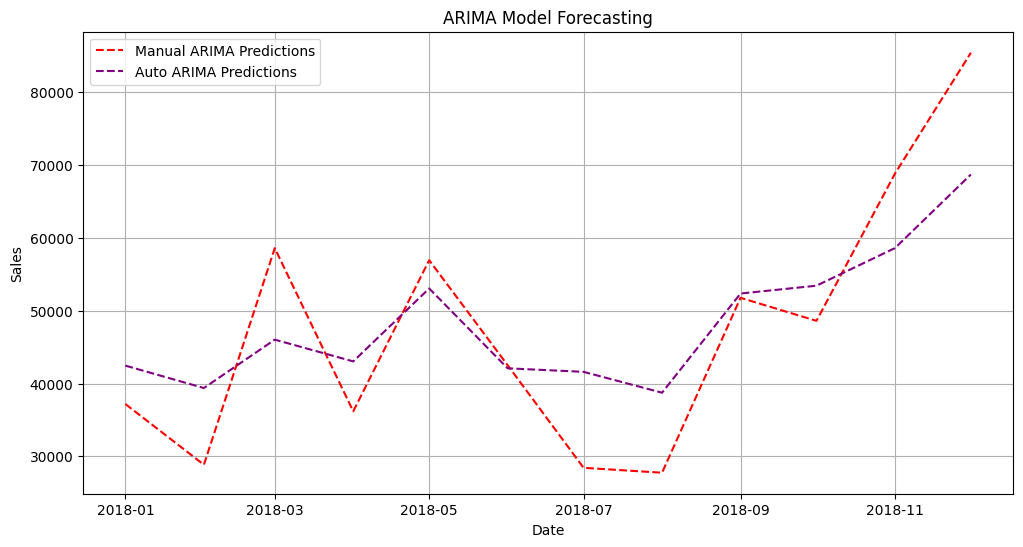

In [13]:
# Graficamos las predicciones de modelos manual y automático 
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, forecast_manual, label='Manual ARIMA Predictions', color='red', linestyle='--')
plt.plot(test_data.index, forecast_auto, label='Auto ARIMA Predictions', color='purple', linestyle='--')
plt.title('ARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

el gráfico compara el rendimiento de dos tipos de modelos ARIMA para predecir las ventas en el período de 2018:

    Manual ARIMA: Requiere más intervención humana y conocimiento del analista. Sus predicciones (línea roja) muestran fluctuaciones bastante marcadas, incluyendo una caída significativa en verano (julio-agosto) y un fuerte repunte al final del año.
    Auto ARIMA: Ofrece una solución más automatizada y busca optimizar los parámetros del modelo. Sus predicciones (línea morada) parecen ser más suaves y menos volátiles que las del ARIMA manual, mostrando una tendencia ascendente más gradual hacia el final del año.

Interpretación Adicional:

Al comparar ambas líneas, se puede evaluar cuál de los enfoques ARIMA parece capturar mejor la tendencia y la estacionalidad de los datos de ventas. En este caso, si los datos reales de ventas para este período fueran visibles, podríamos determinar cuál de los dos modelos (manual o automático) se acerca más a la realidad.

# _Pregunta 4_

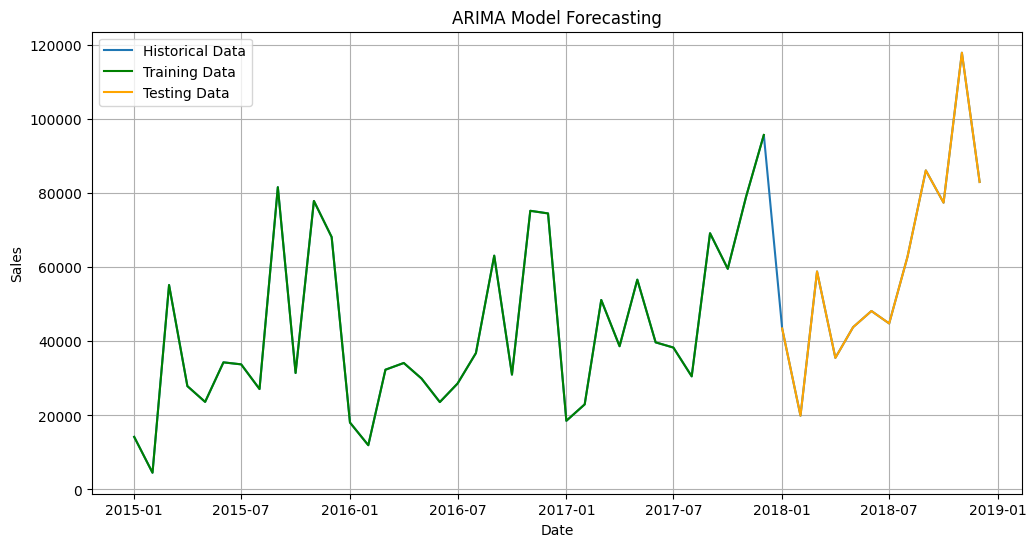

In [14]:
# Graficamos los datos históricos, de entrenamiento y prueba
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Historical Data')
plt.plot(train_data.index, train_data, label='Training Data', color='green')
plt.plot(test_data.index, test_data, label='Testing Data', color='orange')
plt.title('ARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### el gráfico visualiza el proceso de modelado predictivo:

    Entrenamiento: El modelo ARIMA se ajusta a los datos históricos (línea verde).
    Pronóstico: Una vez entrenado, el modelo genera predicciones para el período futuro (que no está explícitamente dibujado como una línea de pronóstico, pero se esperaría que el modelo intentara predecir los datos de prueba).
    Evaluación: Los datos de prueba (línea naranja) permiten comparar las predicciones del modelo con los valores reales observados, para ver la precisión del pronóstico.

 Observando el gráfico, se puede ver que los datos de ventas muestran cierta estacionalidad o patrones recurrentes a lo largo del tiempo. La línea naranja de "Testing Data" parece seguir la tendencia general de los datos anteriores, aunque con variaciones.